In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [51]:
CAPOLUOGHI = ('Aosta', 'Genova', 'Trento', 'Venezia', 'Trieste', 'Firenze', 'Perugia', 'Torino', "L'Aquila", 'Bari', 'Bolzano',
              'Ancona', 'Roma', 'Bologna', 'Napoli', 'Campobasso', 'Potenza', 'Catanzaro', 'Palermo', 'Cagliari', 'Milano')

In [52]:
punteggi = pd.read_csv("punteggi.csv", index_col=0)
indicatori = pd.read_csv("indicatori.csv", index_col=0)
popolazione = pd.read_csv("aggregazioni_popolazione.csv", index_col=0)
province = pd.read_csv("province.csv", index_col=3)
province = popolazione.join(province)
province['CAPOLUOGO'] = province.index.isin(CAPOLUOGHI)

In [53]:
print(f'{punteggi.shape = }')
display(punteggi.head(3))
print(f'{100*"-"}\n{indicatori.shape = }')
display(indicatori.head(3))
print(f'{100*"-"}\n{province.shape = }')
display(province.head(3))

punteggi.shape = (107, 90)


,Amministratori comunali con meno di 40 anni,Anni di studio,Aree protette,Arrivi turistici,Assorbimento del settore residenziale,Cessazioni,Comuni con servizi per le famiglie interamente online,Comuni: capacità di riscossione,Copertura della rete fissa di accesso ultra veloce a internet,Danneggiamenti,...,Startup innovative,Tasso di disoccupazione giovanile,Tasso di infortuni sul lavoro mortali e con inabilità permanente,Tasso di mancata partecipazione al lavoro,Tasso di motorizzazione,Tasso di occupazione,Trend del pil pro capite,Truffe e frodi informatiche,Uscita precoce dal sistema di istruzione e formazione,Valore aggiunto per abitante
PROVINCIA,,,,,,,,,,,,,,,,,,,,,
Agrigento,38.6,10.54,8.9,3.067518,75.0,3.959703,27.0,69.8,36.2,303.1,...,1.96,37.004910,13.0,29.8,79.0,50.7,4.347826,333.3,33.184080,21.6
Alessandria,18.8,10.93,11.1,-1.501014,74.9,5.302991,31.6,73.8,49.0,513.0,...,2.56,21.657233,11.7,7.1,66.0,73.9,2.564103,478.3,27.083689,36.0
Ancona,22.1,11.60,11.9,9.409472,67.4,5.394640,48.9,76.1,64.6,308.0,...,7.86,30.879327,16.7,9.3,64.0,71.5,2.506964,446.0,20.825383,36.8


----------------------------------------------------------------------------------------------------
indicatori.shape = (90, 3)


,UNITA_MISURA,ANNO_RIFERIMENTO,FONTE
INDICATORE,,,
Valore aggiunto per abitante,Migliaia di euro a valori correnti,Stima sul 2025,Prometeia
Trend del pil pro capite,Var % annua,Stima 2025 / 2024,elab. su dati Prometeia
Depositi bancari delle famiglie consumatrici,In migliaia euro pro capite,Al 31 luglio 2025,Banca d'italia


----------------------------------------------------------------------------------------------------
province.shape = (107, 8)


,REGIONE,MACROREGIONE,MEGAREGIONE,POPOLAZIONE,NOME_ISTAT,COD_NUTS,COD_ISTAT,CAPOLUOGO
PROVINCIA,,,,,,,,
Milano,Lombardia,Nord-ovest,Nord,3247623,Milano,ITC4C,15,True
Bolzano,Trentino Alto Adige,Nord-est,Nord,539386,Bolzano/Bozen,ITH10,21,True
Bologna,Emilia-Romagna,Nord-est,Nord,1020865,Bologna,ITH55,37,True


# Plotting

<Axes: xlabel='POPOLAZIONE'>

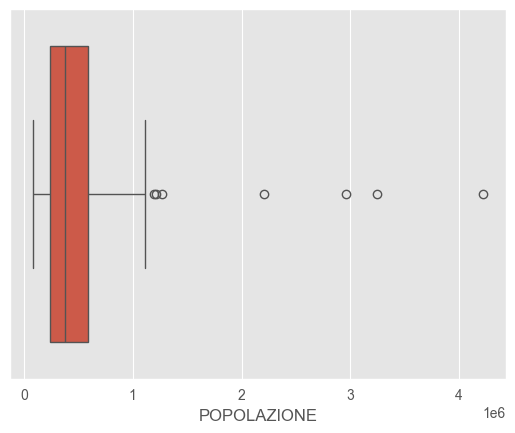

In [175]:
sns.boxplot(data=province, x='POPOLAZIONE')

In [176]:
df = punteggi.copy(deep=True)
#df = df[df.index.isin(list(province[province.MEGAREGIONE == 'Nord'].index))]

In [177]:
plt.style.use('ggplot')

In [178]:
capoluoghi = list(province[province.CAPOLUOGO].index)
grandi_province = list(province[province.POPOLAZIONE > 1_000_000].index)

In [183]:
compara_regione = 'Lombardia'
focus = ['Brescia']
prov_regione = list(province[province.REGIONE == compara_regione].index)
altre = ['Roma', 'Bologna', 'Napoli', 'Torino']

In [185]:
colore_1 = "tab:green"
colore_focus = "tab:blue"
colore_2 = "tab:orange"
figsize = 1 * np.array((21, 9))

def plot_indicatore(df: pd.DataFrame, indicatore: str, focus_citta: list[str], altre_1: list[str] = None, altre_2: list[str] = None) -> None:
    df = df.sort_values(by=indicatore)
    if altre_1 is None:
        altre_1 = []
    if altre_2 is None:
        altre_2 = []
    colors = []
    for city in df.index:
        color = "lightgray"
        if city in altre_1:
            color = colore_1
        if city in altre_2:
            color = colore_2
        if city in focus_citta:
            color = colore_focus
        colors.append(color)

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    sns.barplot(data=df, y=indicatore, x=df.index, ax=ax, palette=colors, hue=df.index, legend=False)
    title = f"{indicatore} - {indicatori.loc[indicatore].UNITA_MISURA} - {indicatori.loc[indicatore].ANNO_RIFERIMENTO}"
    ax.set_title(title, size='xx-large')
    ax.set_xlabel(f'Fonte: {indicatori.loc[indicatore].FONTE}')

    for container, color in zip(ax.containers, colors):
        if color != "lightgray":
            ax.bar_label(container, fmt='%.1f', padding=3, fontsize='xx-small')

    for label in ax.get_xticklabels():
        label.set_rotation(90)
        if label.get_text() in focus + altre_1 + altre_2:
            label.set_fontsize('x-large')
            label.set_fontweight('bold')
        else:
            label.set_fontsize('small')

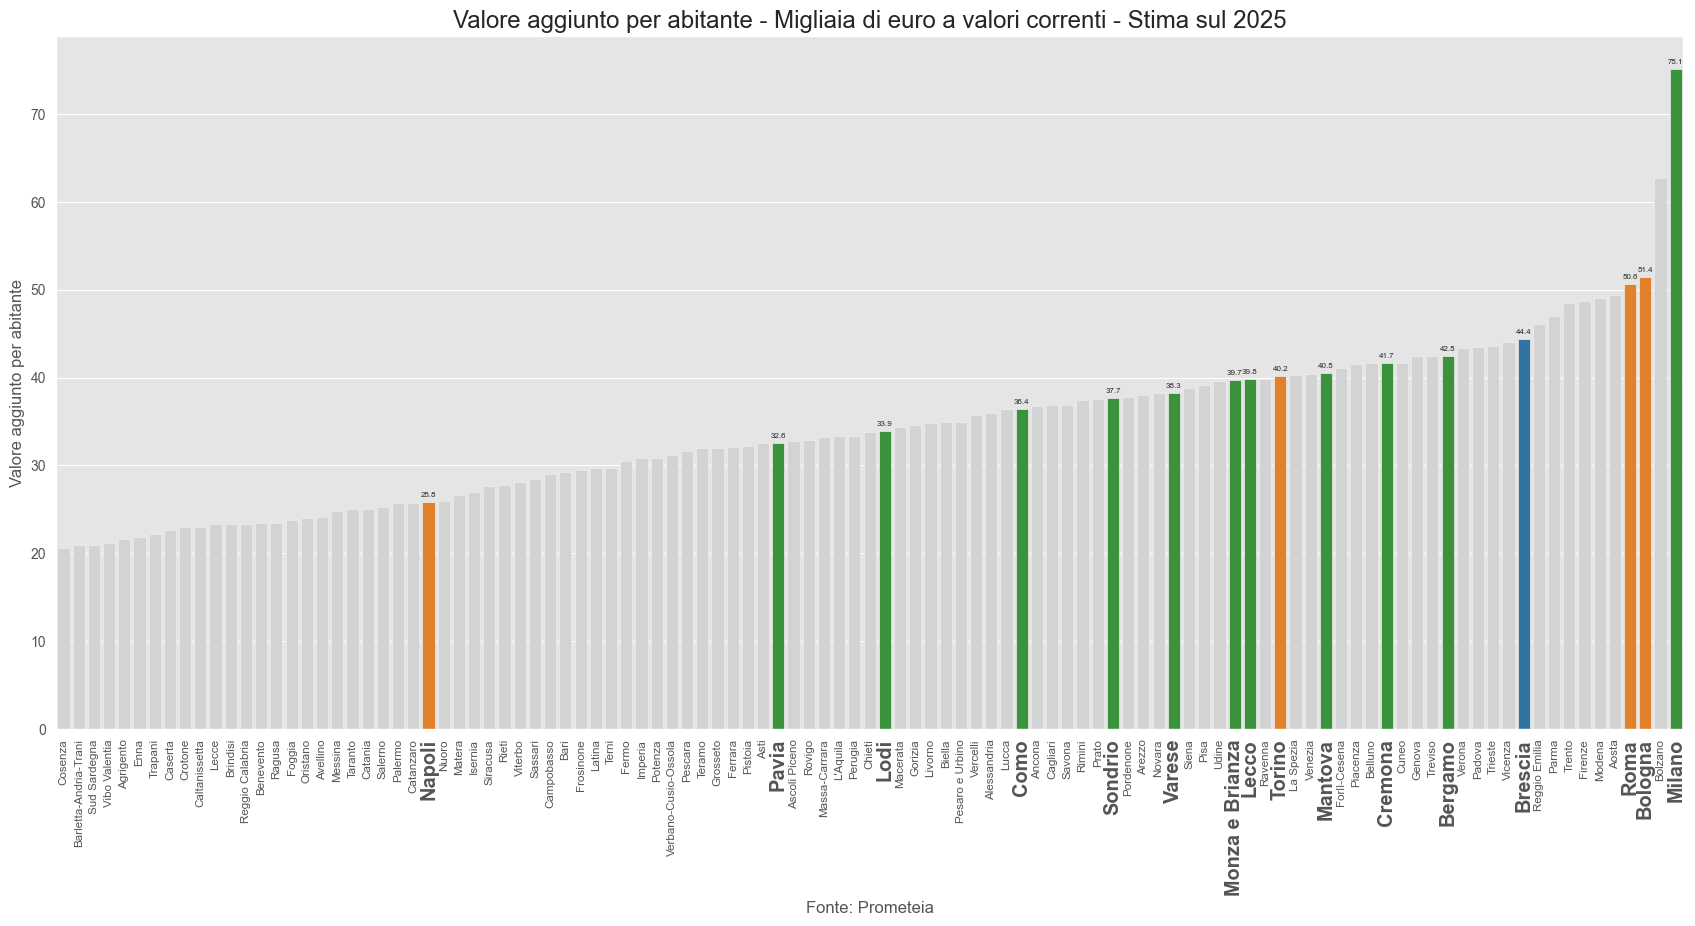

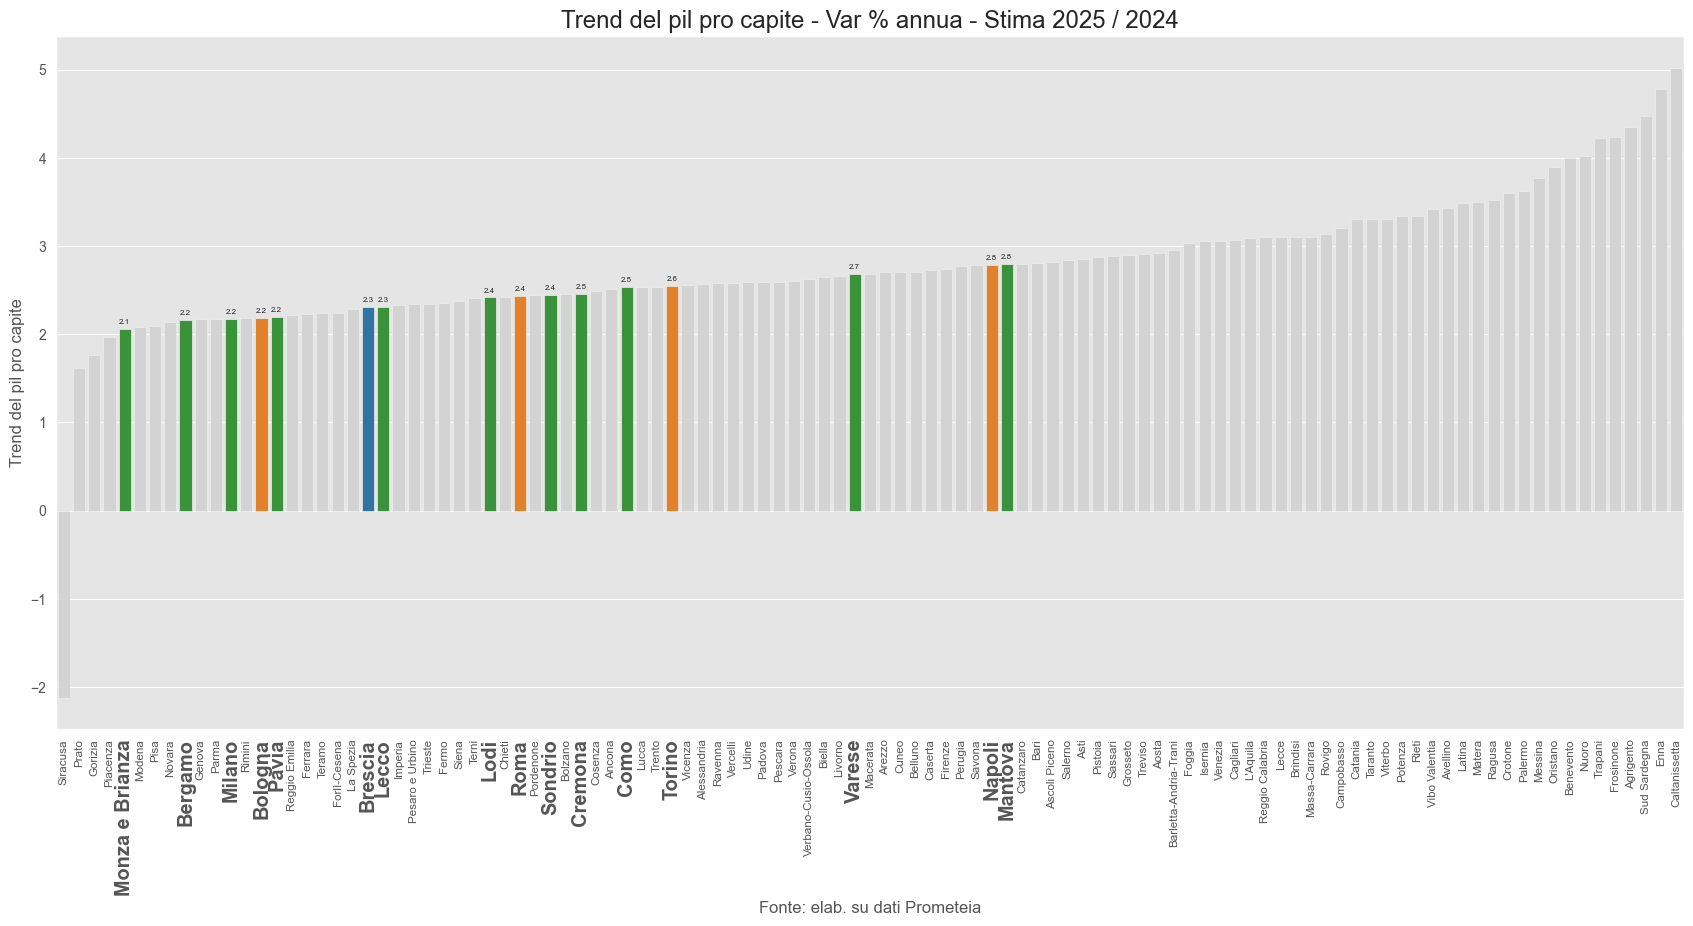

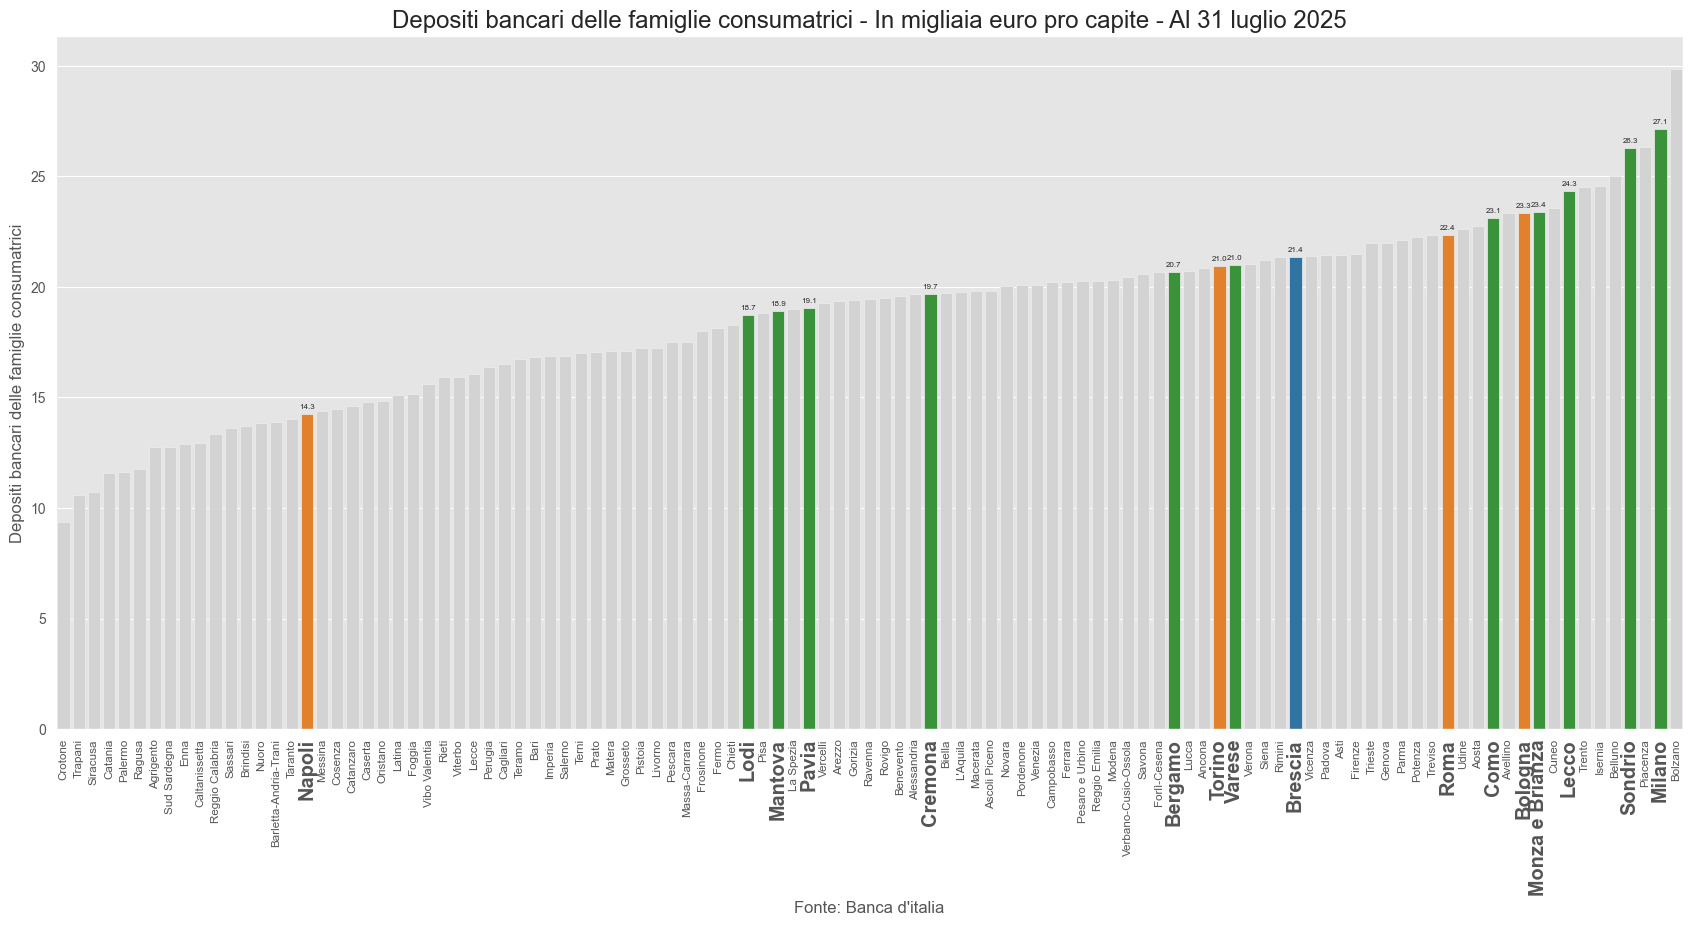

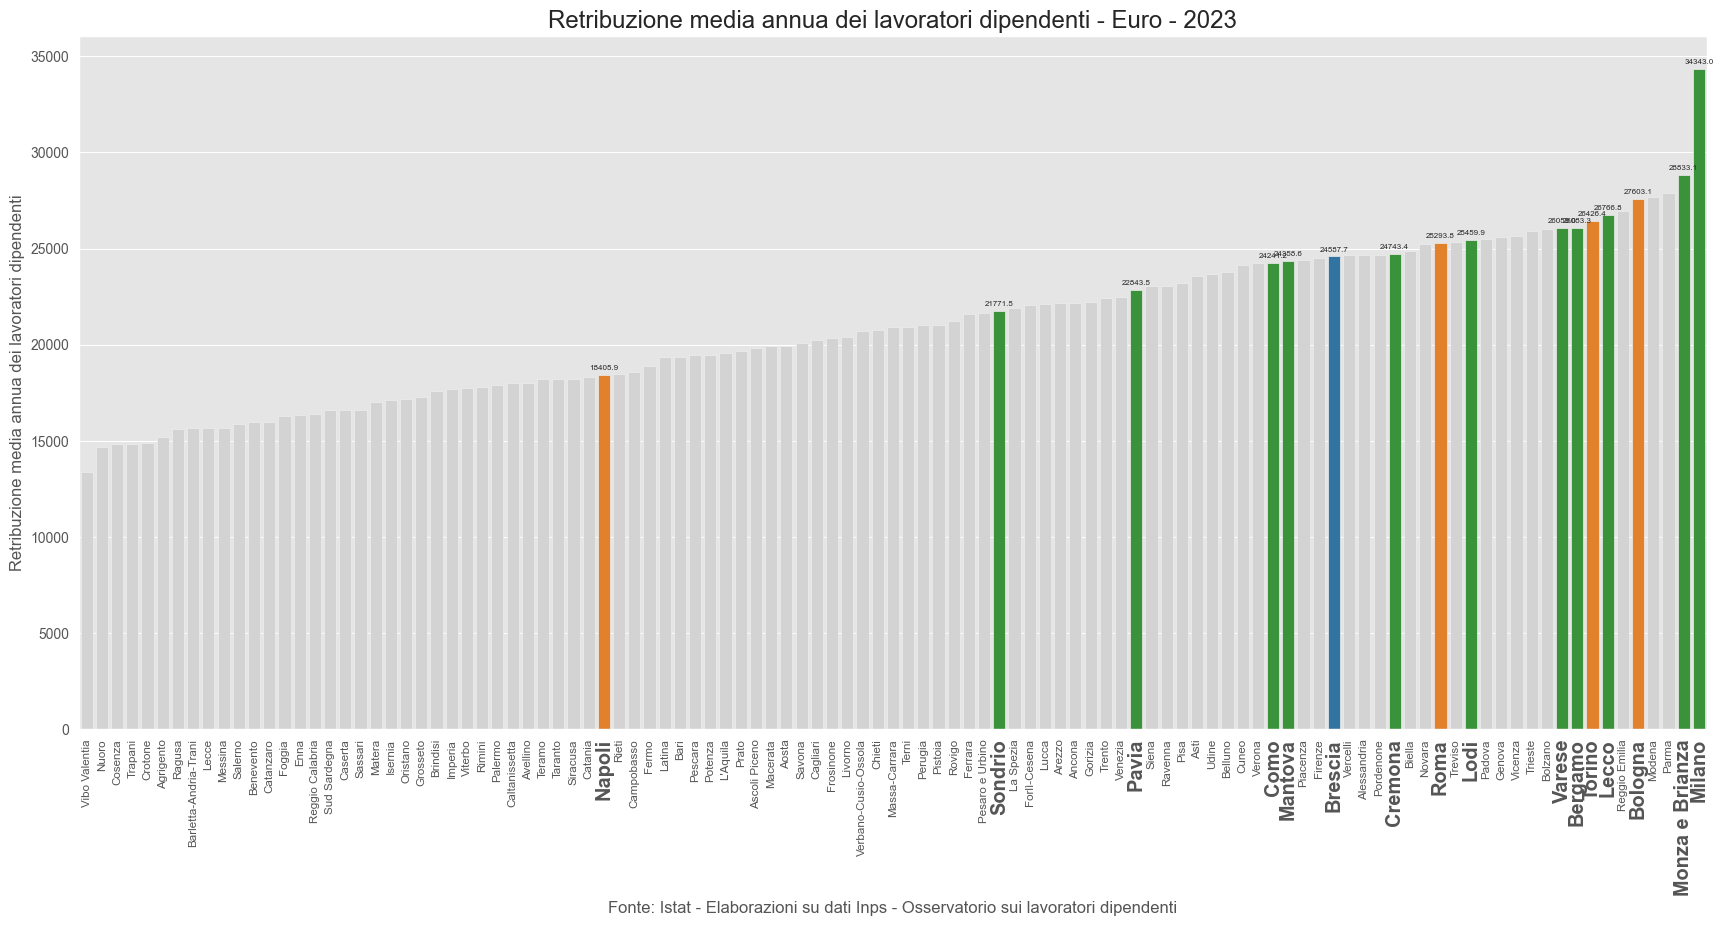

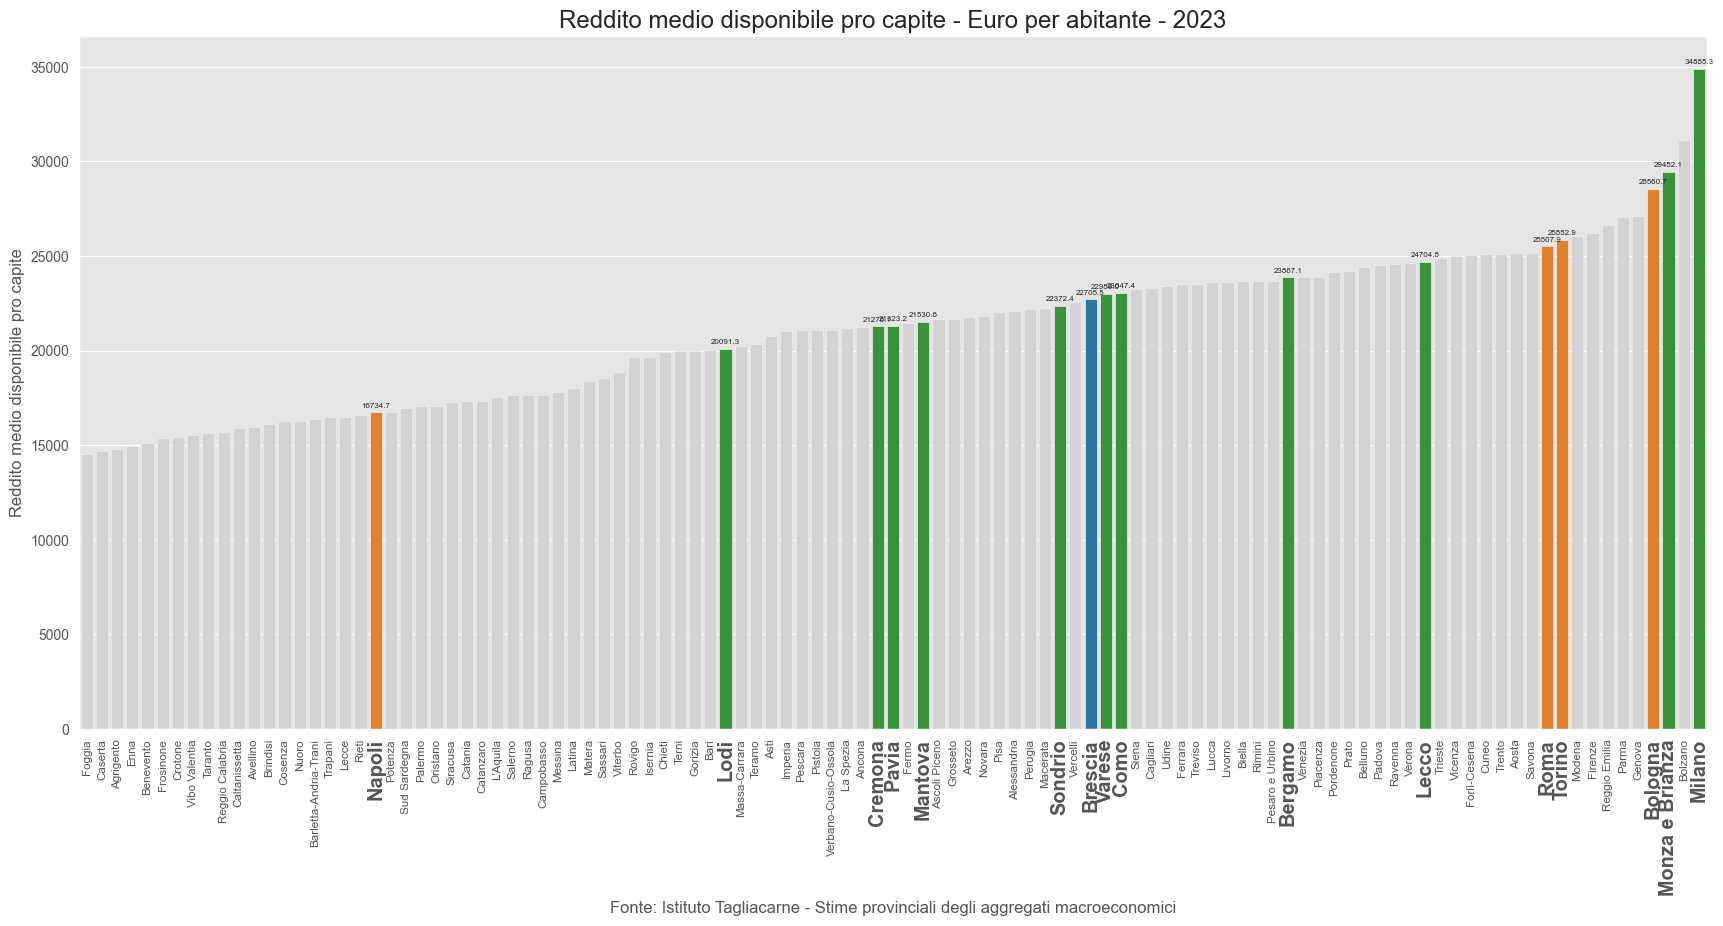

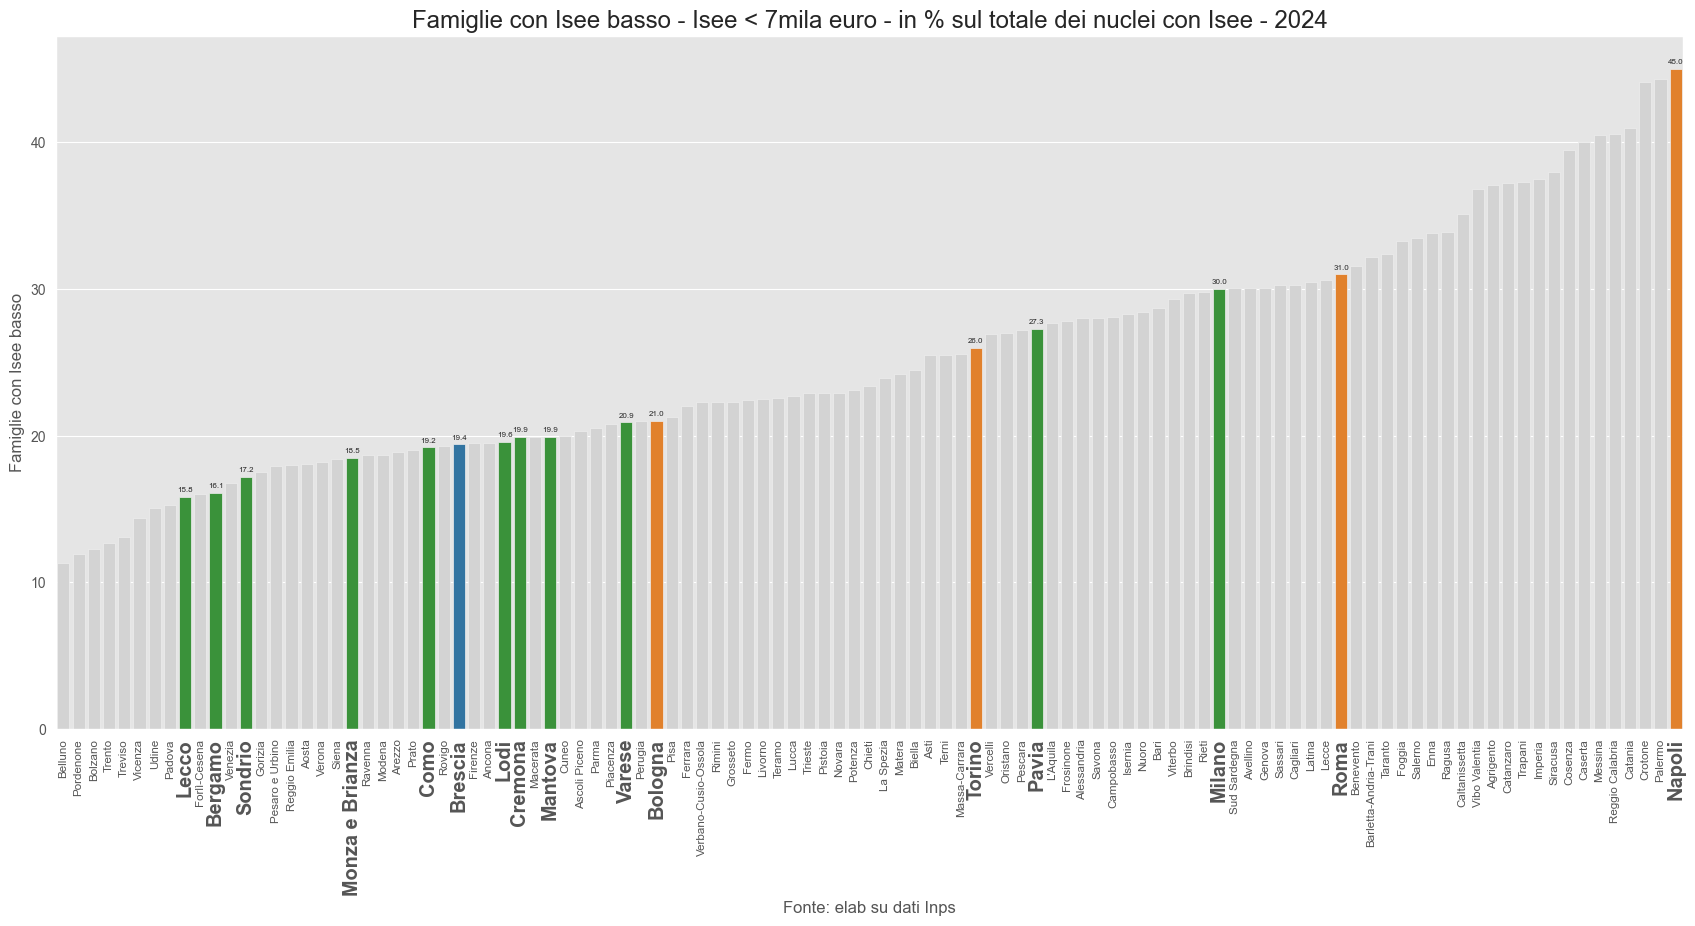

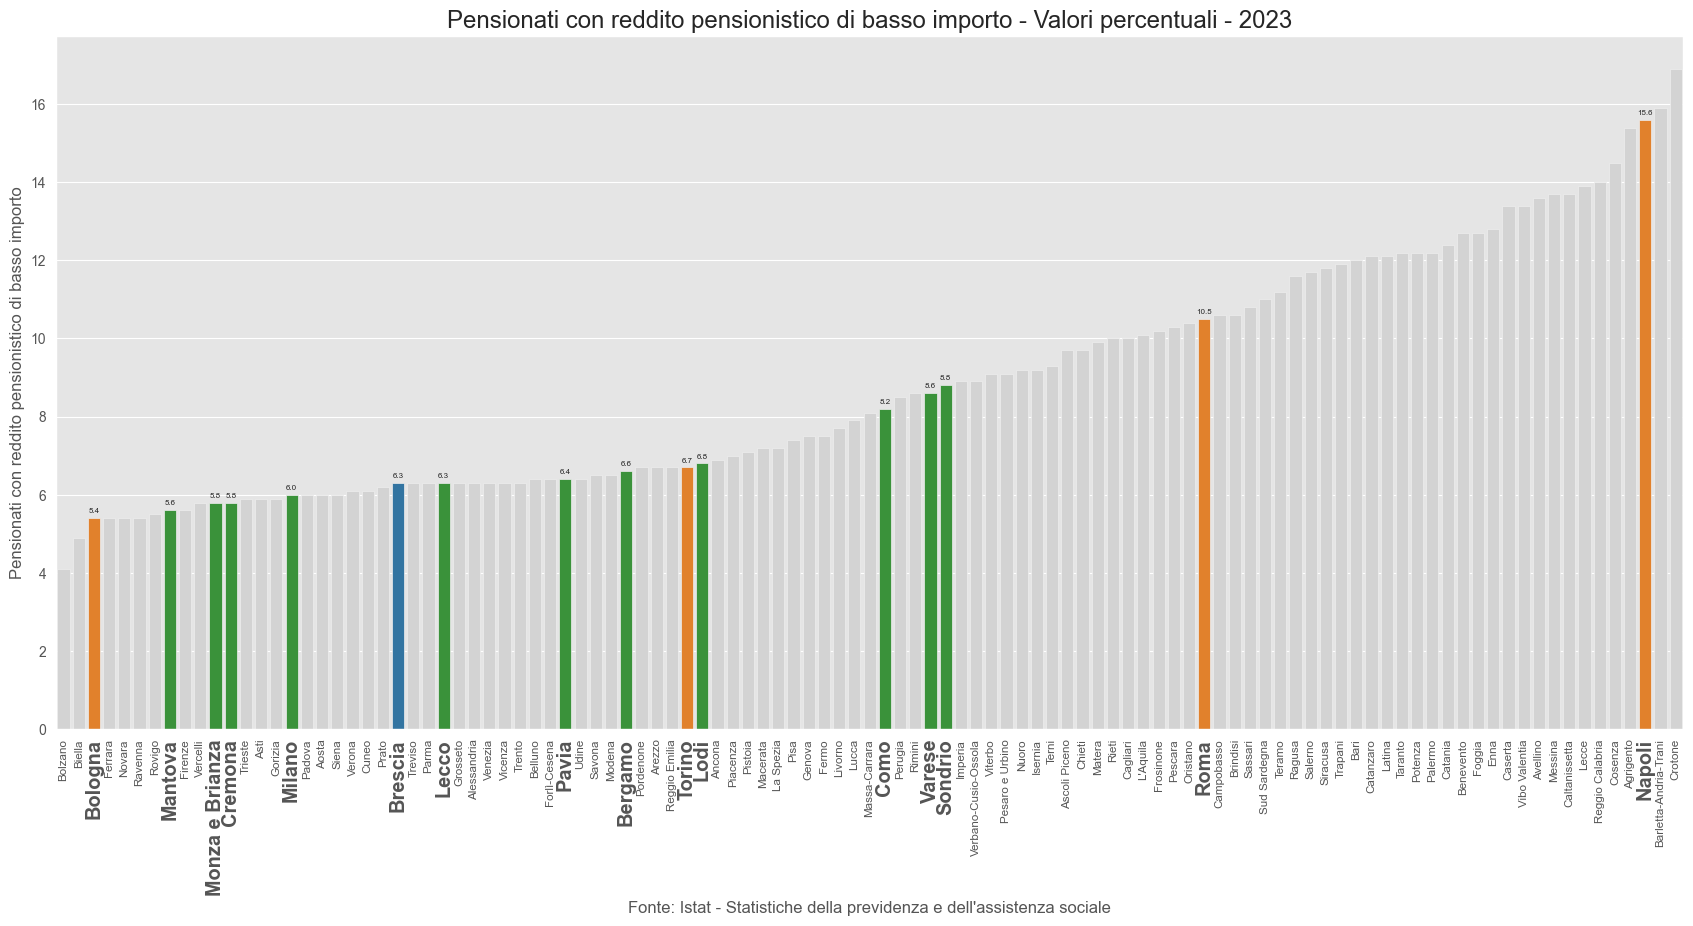

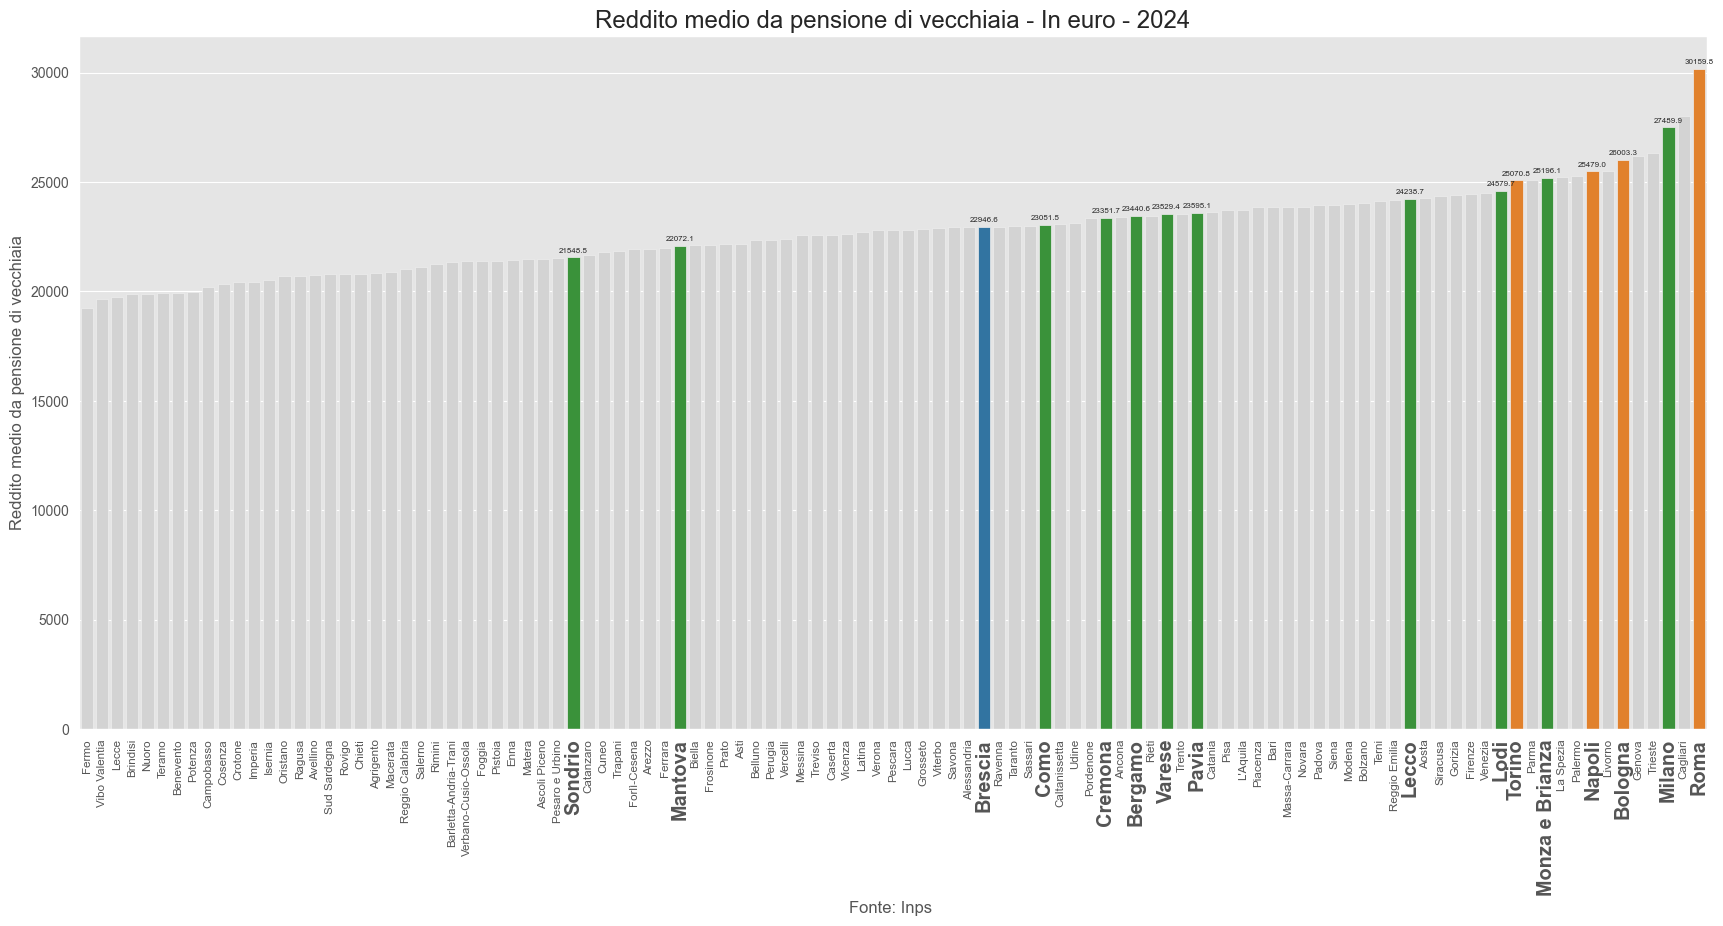

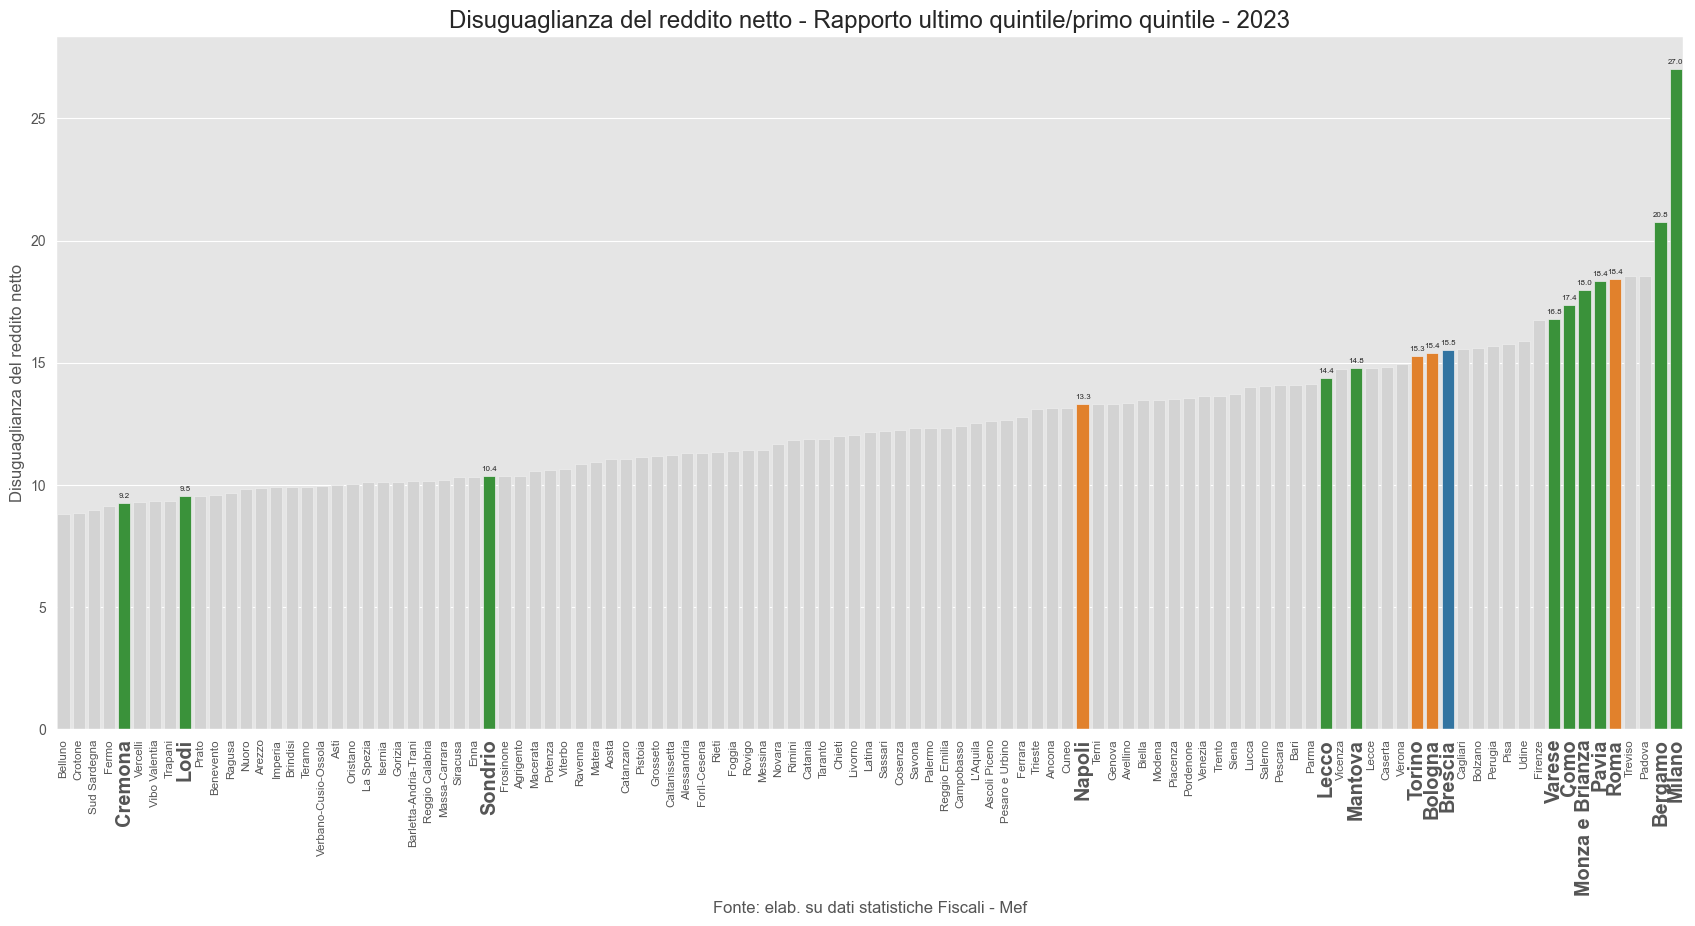

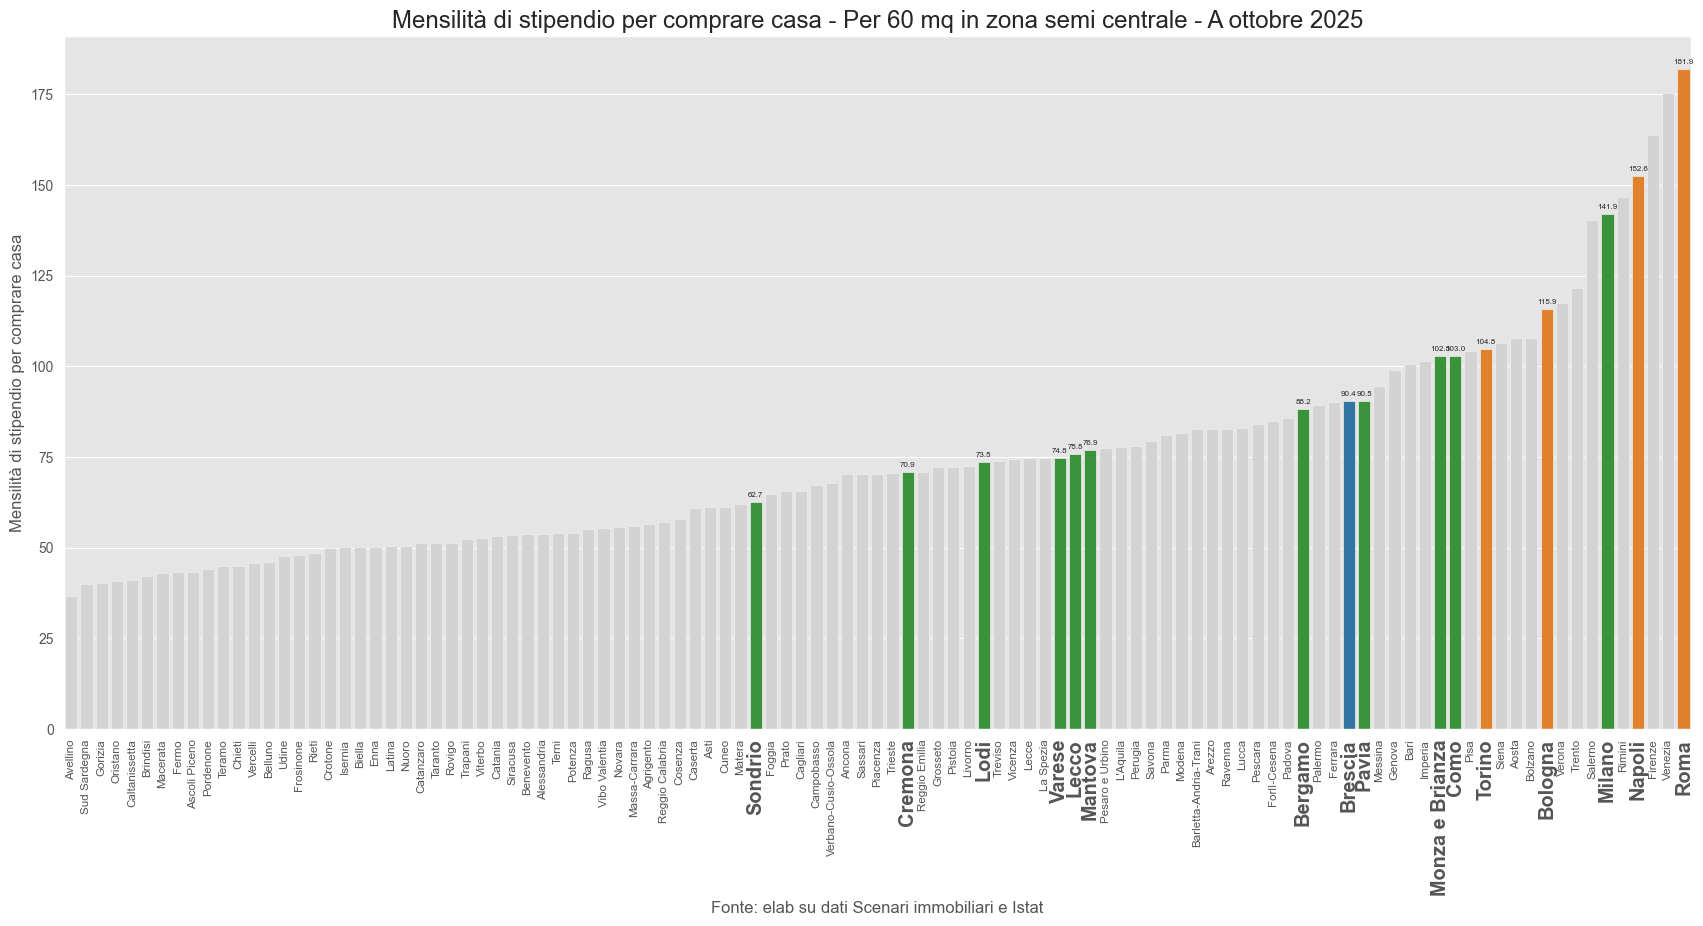

In [187]:
for ind in indicatori.index[:10]:
    plot_indicatore(df, ind, focus, prov_regione, altre)